## 演算法與資料分析期末作業
### Data Set
http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29
## Models Traning and Benchmarking
1. 資料集分割及訓練方式
  * 訓練及測試集為80%，20%，採用CV=10，RandomState=42。
2. 計算分類指標
1. Accuracy
2. Precision
3. Recall
4. F1 score
5. Sensitivity
6. Specificity
7. ROC AUC
3. 至少有一種方法精確率(Accuracy)要達到 >= 97%
4. 繳交程式(github url or upload file)及執行結果畫面。

## 作法
* 透過將資料進行分析取出前20類與dianosis最相關的類別
* 分別使用了**Decision Tree**、**KNN with grid search(k=3,4,5)**、**LogisticRegression** 
* 詳細過程可參考程式碼

## 結果
* LogisticRegression的accuracy > 97%
* 執行結果畫面亦可參考以下輸出

### Decision Tree
1. Accuracy = 94%
2. Precision = 93%
3. Recall = 91%
4. F1 score = 92%
5. Sensitivity = 96%
6. Specificity = 91%
7. ROC AUC = 93%

### KNN with grid search
1. Accuracy = 96%
2. Precision = 95%
3. Recall = 95%
4. F1 score = 95%
5. Sensitivity = 97%
6. Specificity = 95%
7. ROC AUC = 96%

### LogisticRegression
1. Accuracy = 97%
2. Precision = 95%
3. Recall = 97%
4. F1 score = 96%
5. Sensitivity = 98% 
6. Specificity = 95%
7. ROC AUC = 97%


### 將dataset從google drive mount進來 並將 無限大替代成 N/A

In [114]:
from google.colab import drive
drive.mount('/content/mydrive/')

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).


In [115]:
import pandas as pd
pd.set_option('use_inf_as_na', True)
df = pd.read_csv('/content/mydrive/MyDrive/Breast Cancer Wisconsin (Diagnostic) Data Set.csv')
df.drop(["Unnamed: 32"],axis=1,inplace=True)
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 將資料複製避免影響原資料 然後將分類轉成數字(M=1,B=0)

In [116]:
import numpy as np
data1=df.copy()
def classifier(data1):
    if data1["diagnosis"]=="M":
        return "1"
    else:
        return "0"
data1["diagnosis"] = data1.apply(classifier, axis=1) 
data1.replace([np.inf, -np.inf], np.nan, inplace=True) 
data1["diagnosis"]=pd.to_numeric(data1["diagnosis"],errors="coerce") 

In [117]:
print(data1.columns,df.shape)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') (569, 32)


### M類跟B類的圖形化分析

B    357
M    212
Name: diagnosis, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


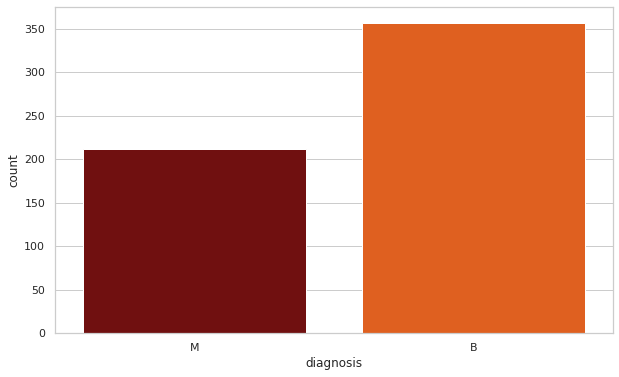

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid") 
print(df['diagnosis'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('diagnosis', data=df, palette='gist_heat')
plt.show()

### 查看各類別的關係並透過log的方式將數值做一個正規化 然後分析

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

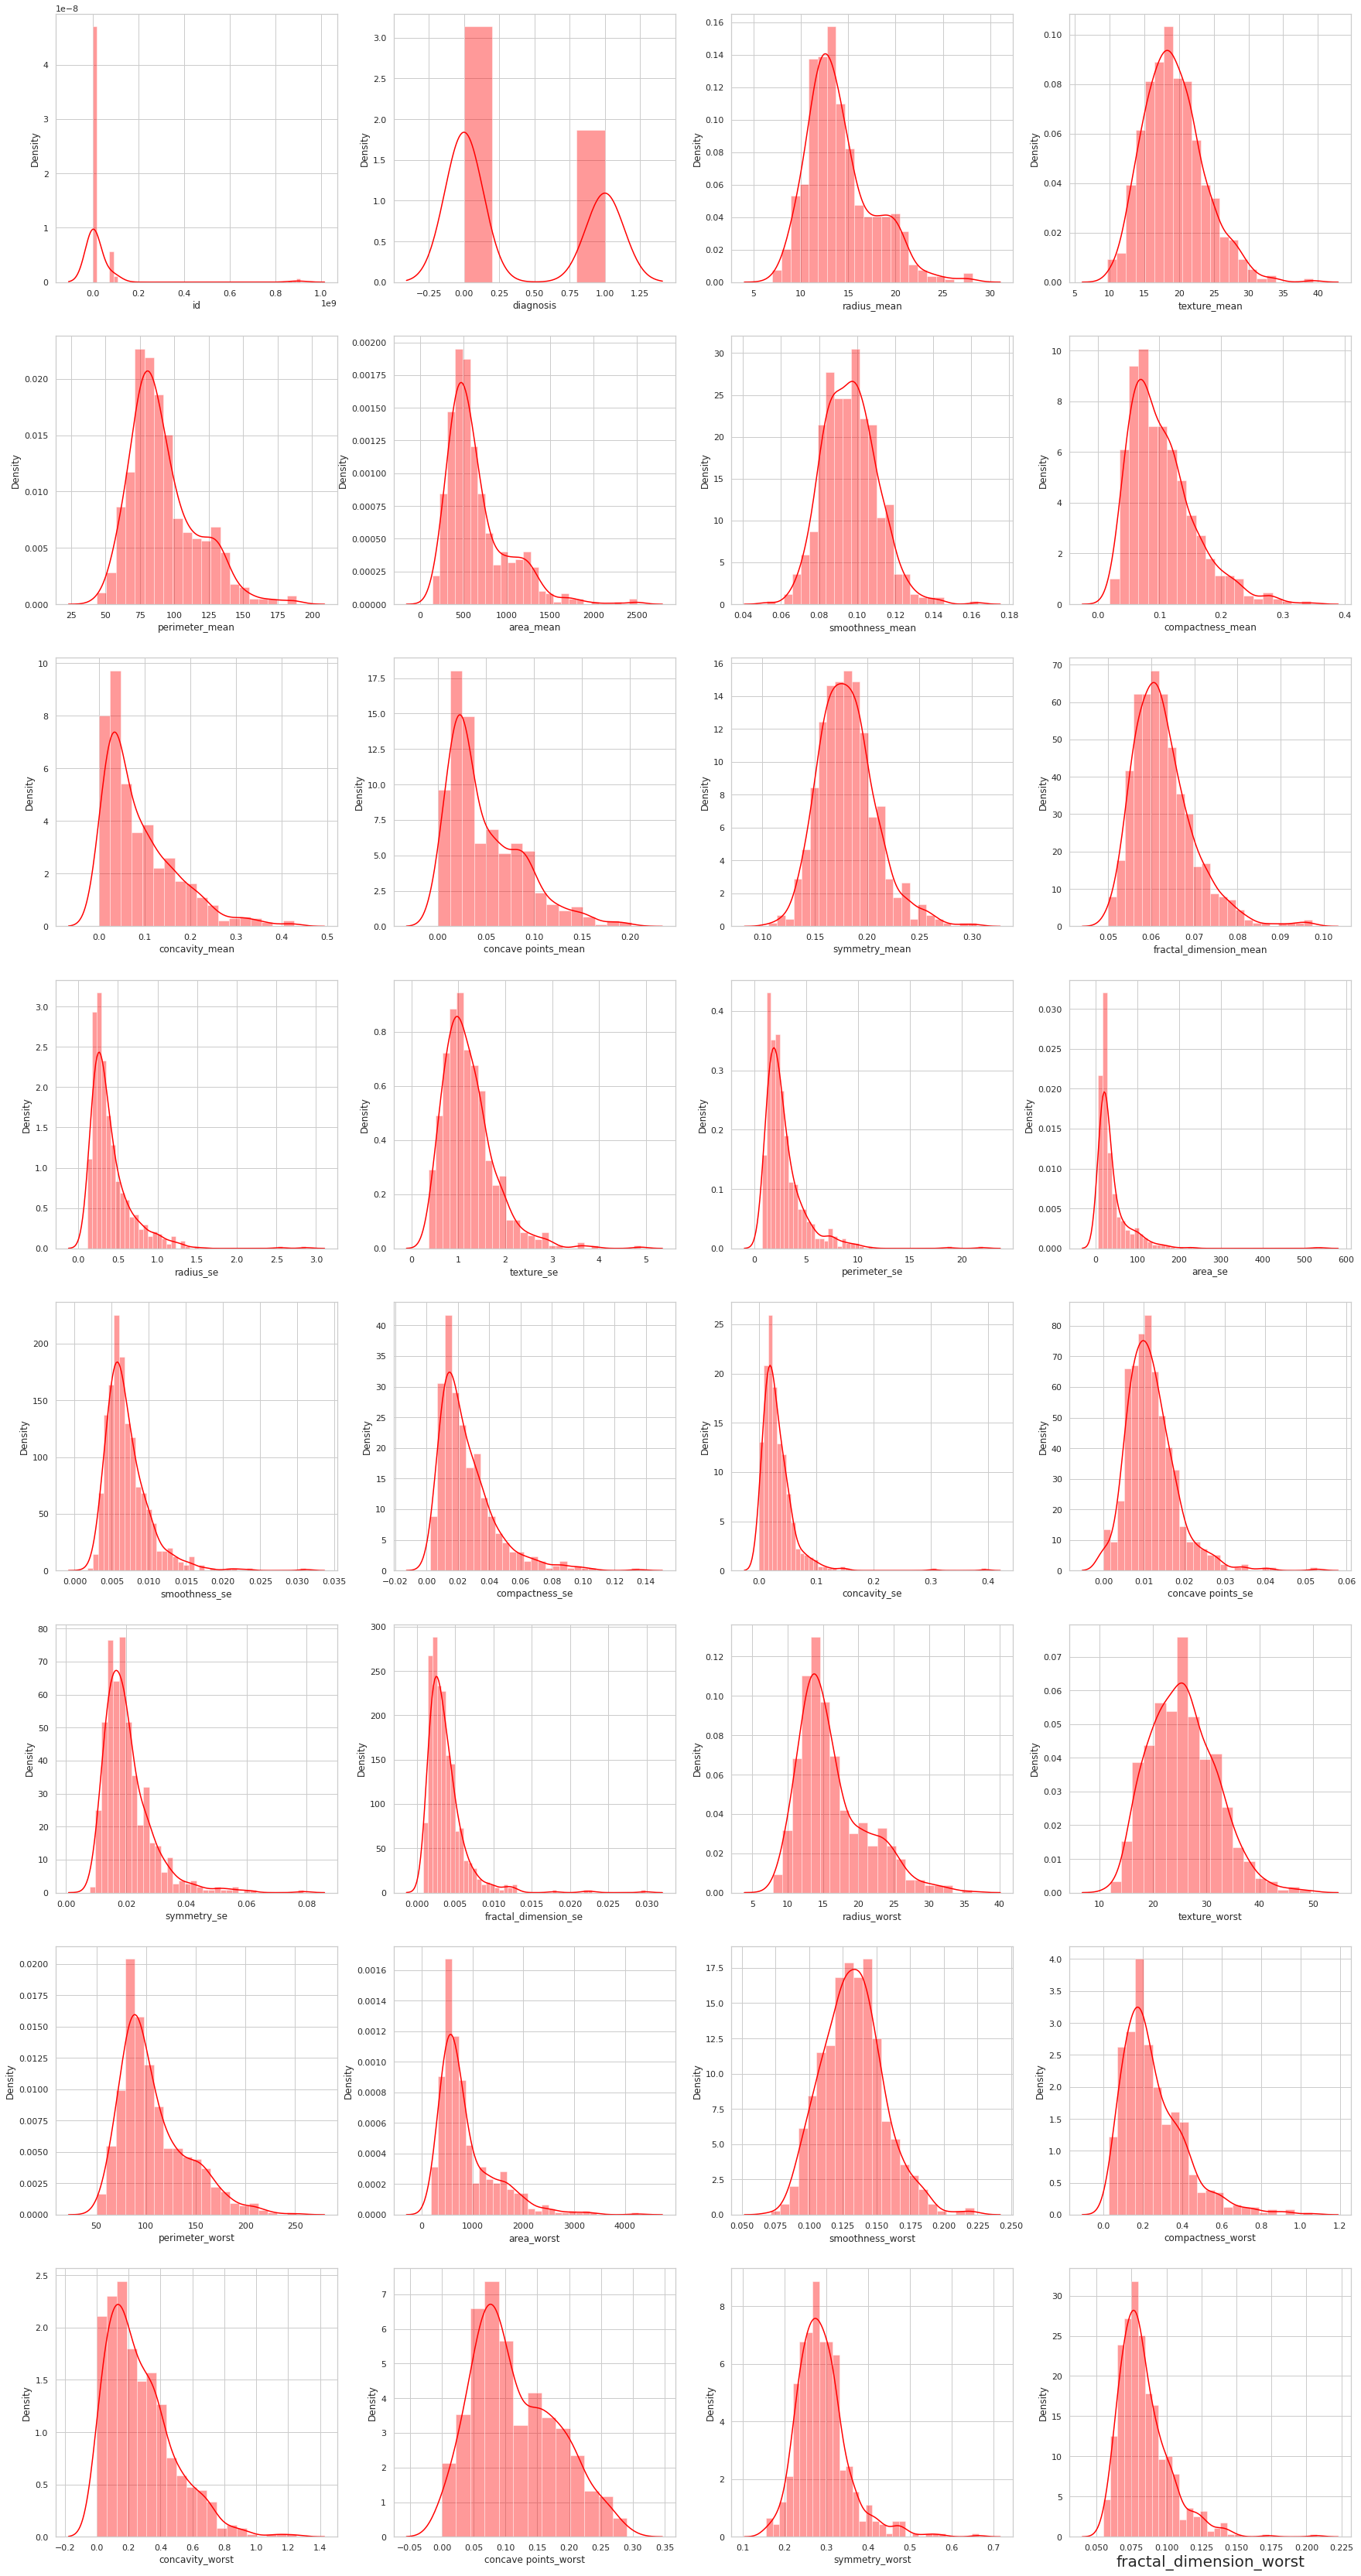

In [119]:
color = sns.color_palette("pastel") 

fig, ax1 = plt.subplots(8,4, figsize=(30,60)) 
k = 0
columns = list(data1.columns)
for i in range(8):
    for j in range(4):
            sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'red') 
            plt.xlabel(columns[k],size=20)
            k += 1
plt.show()

In [120]:
#Log transform
def log_transform(col):
    return np.log(col[0])

data1["compactness_mean"]=data1[["compactness_mean"]].apply(log_transform, axis=1)
data1["concavity_mean"]=data1[["concavity_mean"]].apply(log_transform, axis=1)
data1["concave points_mean"]=data1[["concave points_mean"]].apply(log_transform, axis=1)
data1["radius_se"]=data1[["radius_se"]].apply(log_transform, axis=1)
data1["perimeter_se"]=data1[["perimeter_se"]].apply(log_transform, axis=1)
data1["smoothness_se"]=data1[["smoothness_se"]].apply(log_transform, axis=1)
data1["compactness_se"]=data1[["compactness_se"]].apply(log_transform, axis=1)
data1["concavity_se"]=data1[["concavity_se"]].apply(log_transform, axis=1)
data1["symmetry_se"]=data1[["symmetry_se"]].apply(log_transform, axis=1)
data1["fractal_dimension_se"]=data1[["fractal_dimension_se"]].apply(log_transform, axis=1)
data1["area_worst"]=data1[["area_worst"]].apply(log_transform, axis=1)
data1["compactness_worst"]=data1[["compactness_worst"]].apply(log_transform, axis=1)
data1["concavity_worst"]=data1[["concavity_worst"]].apply(log_transform, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

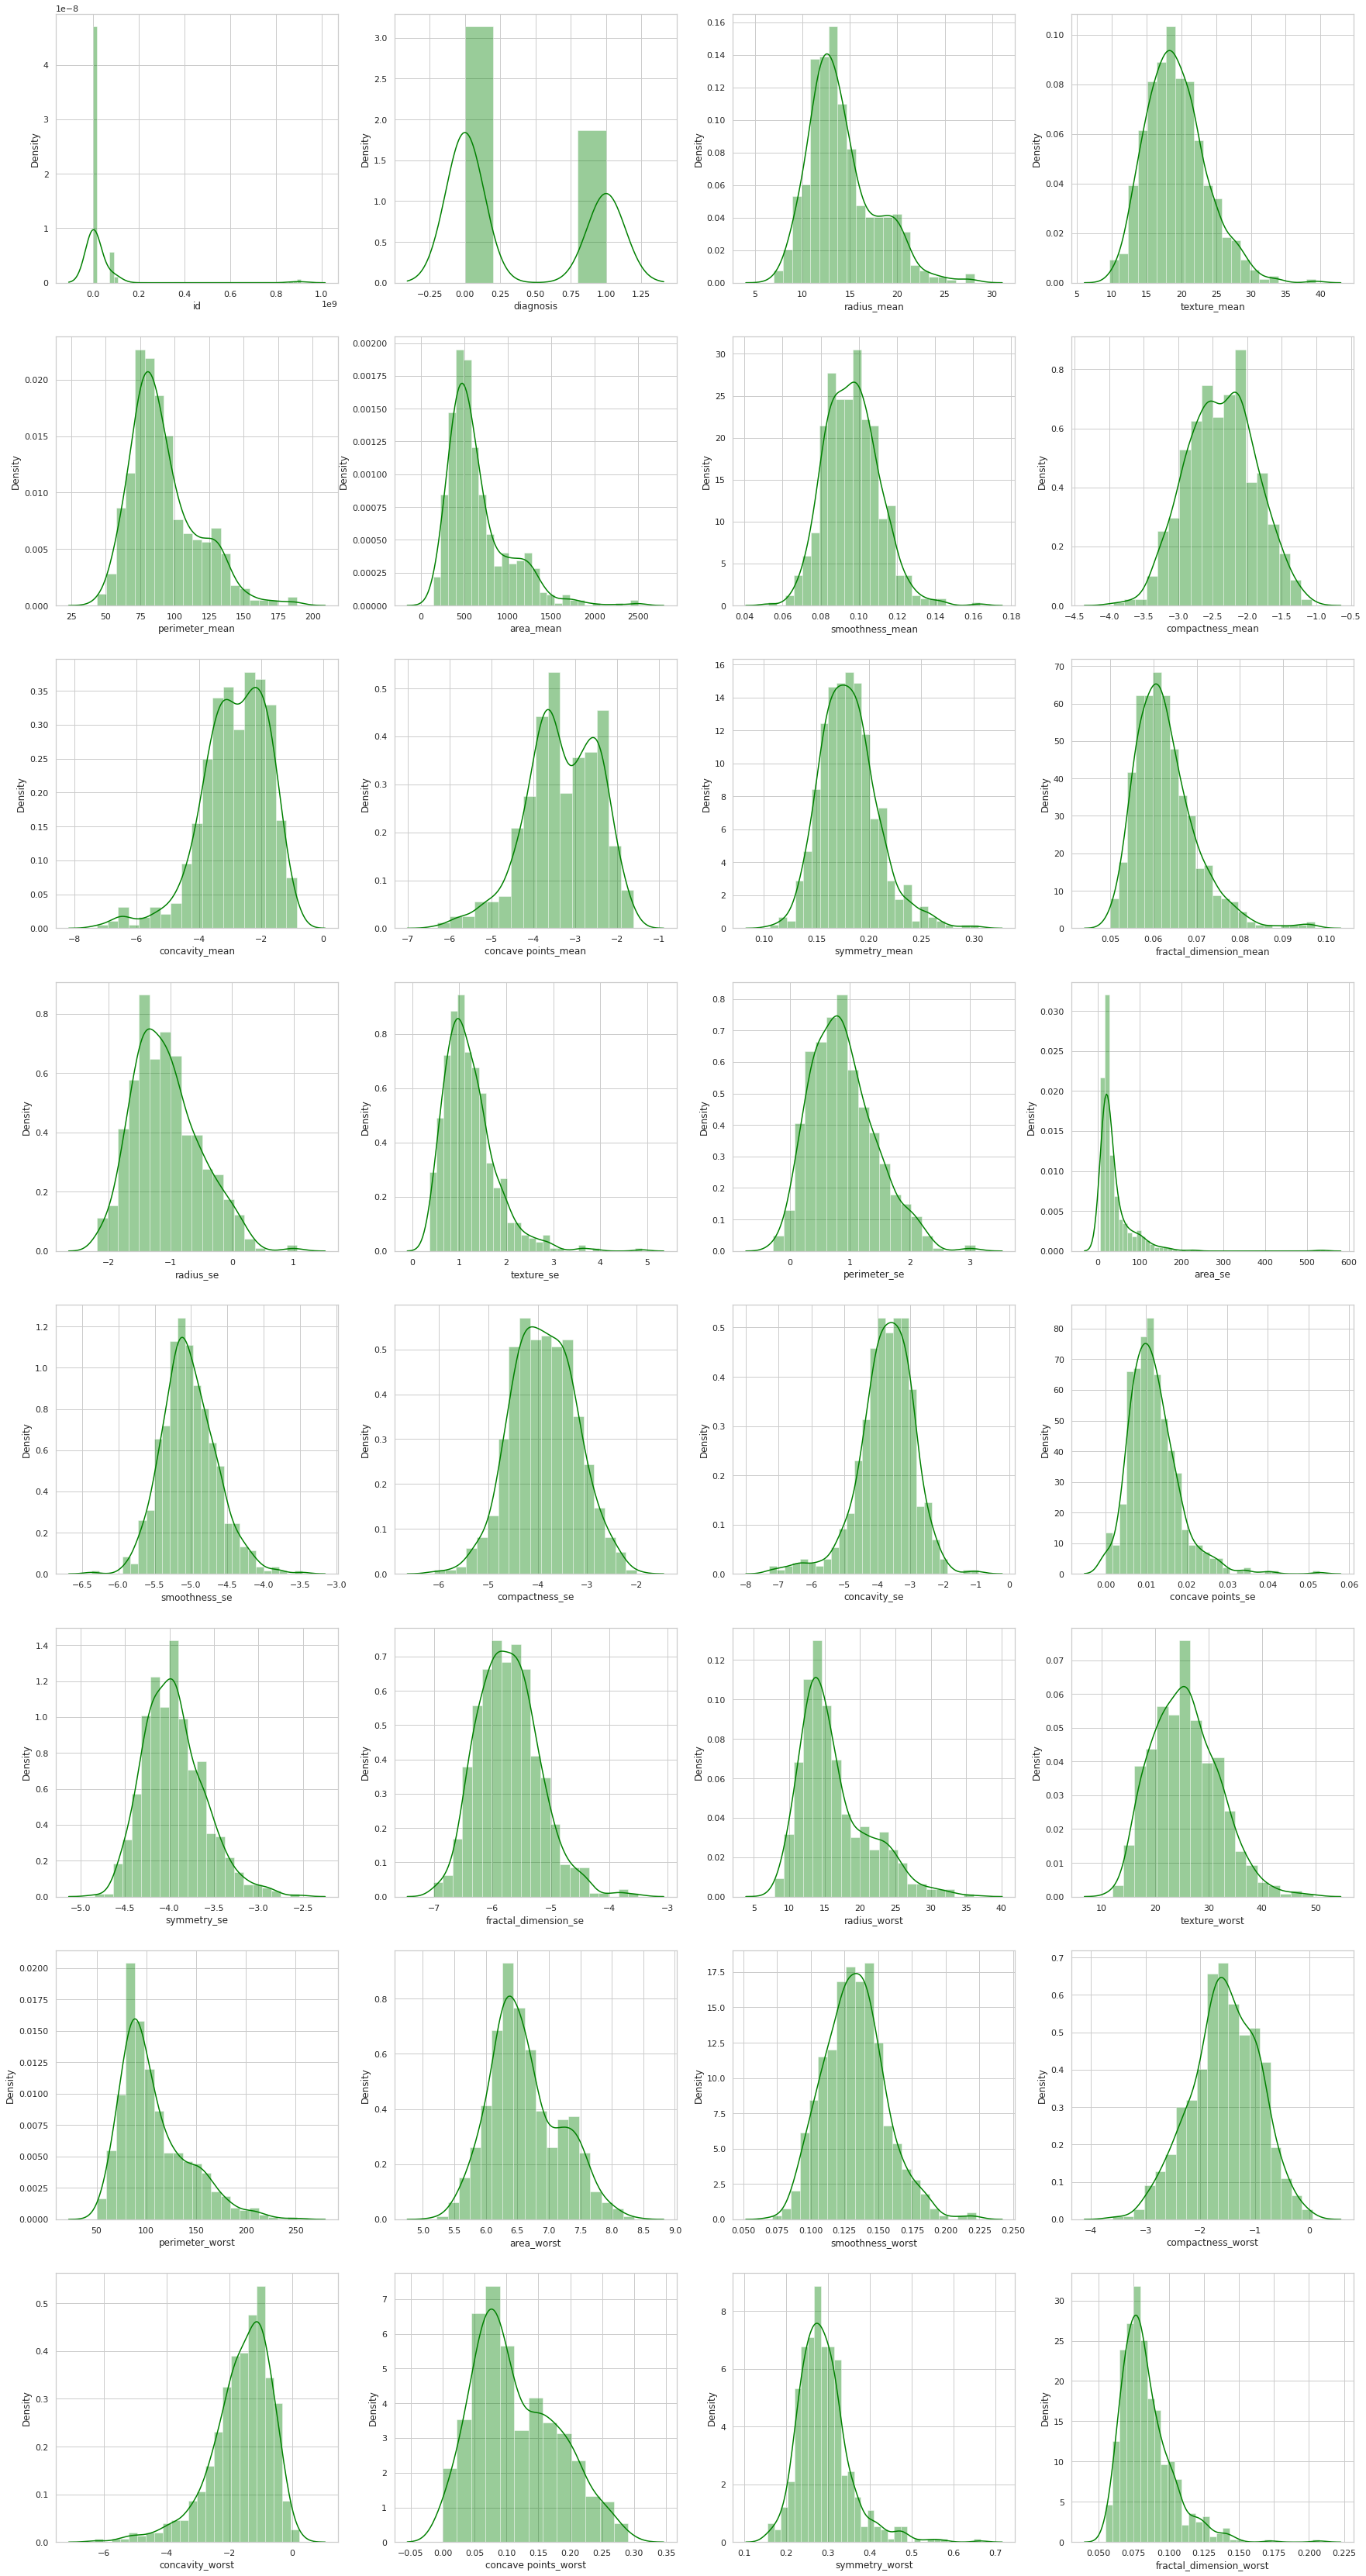

In [121]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(data1.columns)
for i in range(8):
    for j in range(4):
        sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'green')
        k += 1
plt.show()

### 分析並找出top20相關之類別

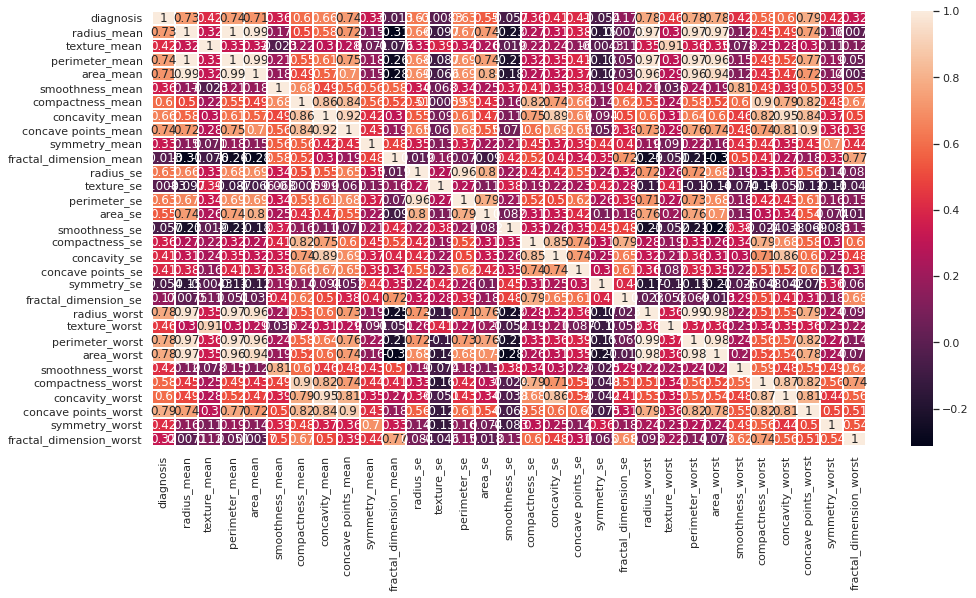

diagnosis                  1.000000
concave points_worst       0.793566
area_worst                 0.784062
perimeter_worst            0.782914
radius_worst               0.776454
perimeter_mean             0.742636
concave points_mean        0.736333
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.655020
perimeter_se               0.634414
radius_se                  0.628407
concavity_worst            0.596354
compactness_mean           0.596313
compactness_worst          0.583762
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concavity_se               0.408721
concave points_se          0.408042
compactness_se             0.364820
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
fractal_dimension_se       0.166057
id                         0

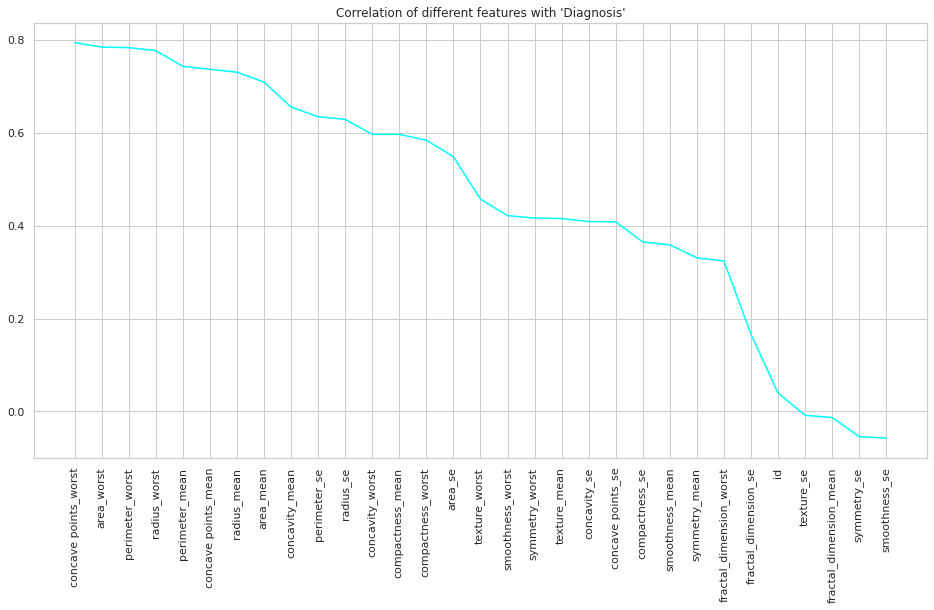

In [122]:
plt.figure(figsize=(16,8))   
corr=data1.drop(["id"],axis=1).corr()# id 不算
sns.heatmap(corr,annot=True,linewidth=1) 
plt.show()

#Cvorrealtion of features in descending order
print(data1.corr()['diagnosis'].sort_values(ascending=False)) # 輸出跟diagnosis的相關係數

plt.figure(figsize=(16,8))
plt.plot(data1.corr()['diagnosis'].sort_values(ascending=False)[1:],color="cyan") 
plt.title("Correlation of different features with 'Diagnosis'")
plt.xticks(rotation=90)
plt.show()

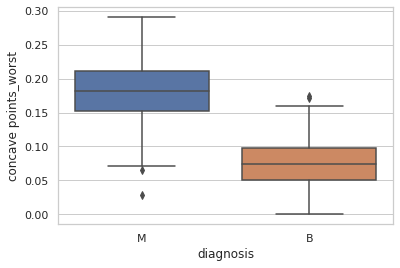

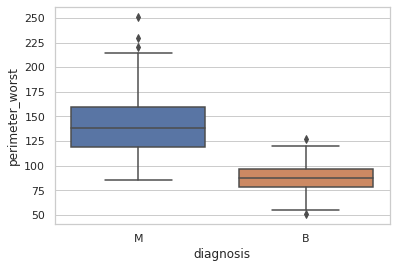

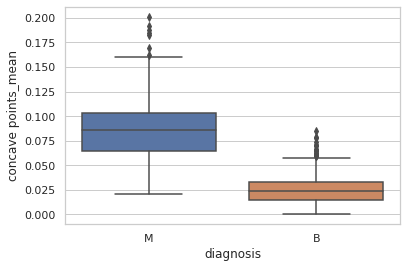

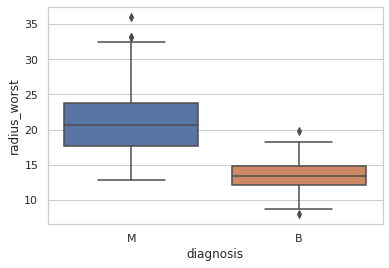

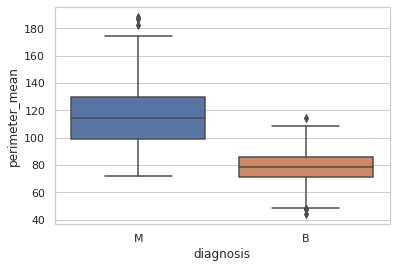

In [123]:
sns.boxplot(data=df,x="diagnosis",y="concave points_worst")
plt.show()
sns.boxplot(data=df,x="diagnosis",y="perimeter_worst")
plt.show()
sns.boxplot(data=df,x="diagnosis",y="concave points_mean")
plt.show()
sns.boxplot(data=df,x="diagnosis",y="radius_worst")
plt.show()
sns.boxplot(data=df,x="diagnosis",y="perimeter_mean")
plt.show()

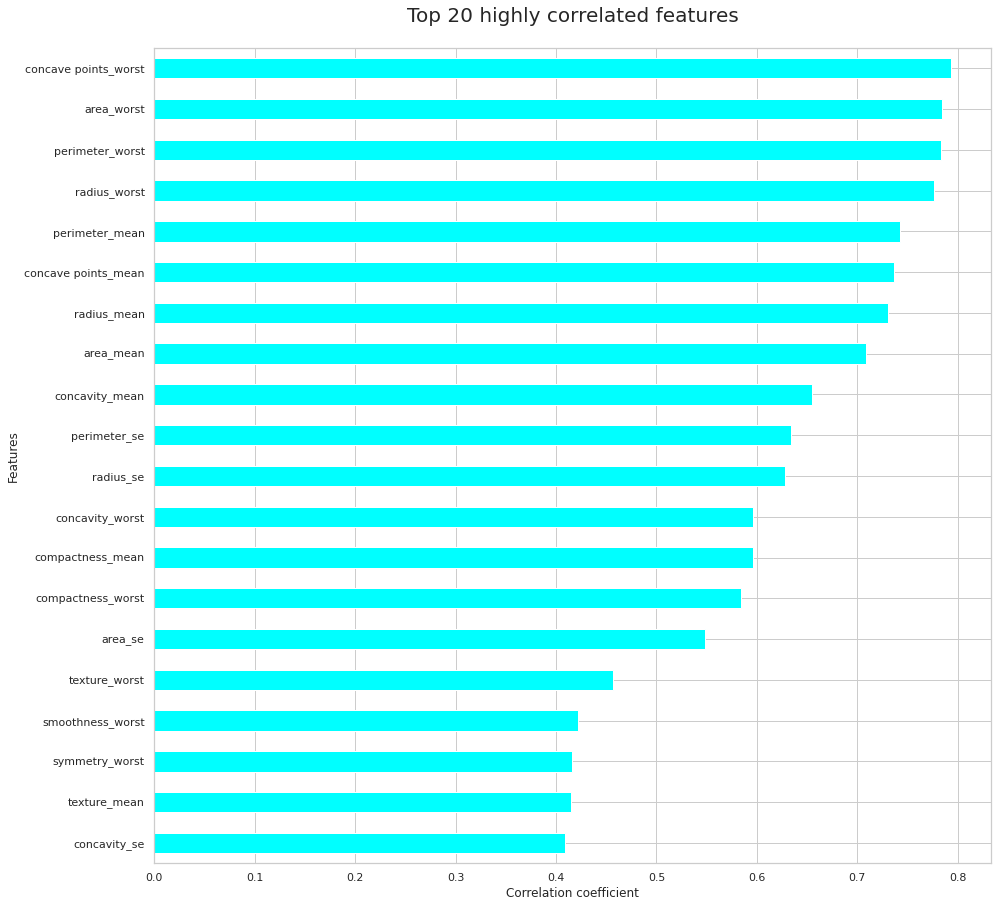

In [124]:
plt.figure(figsize=(15,15))

data1.corr().diagnosis.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:21][::-1].plot(kind='barh',color='cyan') 
plt.title("Top 20 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

In [125]:
X = data1.iloc[:,2:32]
y = data1['diagnosis']

In [126]:
from sklearn.model_selection import train_test_split
for col in X.columns:
    X[col][np.isinf(X[col])]=X[col].mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [127]:
selected_features=data1.corr().diagnosis.sort_values(ascending=False).iloc[1:21][::-1].index
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

### 方法一 Decision Tree 

In [129]:
from sklearn.tree import DecisionTreeClassifier
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
DTC_gini.fit(X_train, y_train)
y_pred = DTC_gini.predict(X_test)


In [130]:
from sklearn.model_selection import cross_val_predict
DTC_gini_cross_val = cross_val_predict(DTC_gini,X_train,y_train,cv=10)

In [131]:
from sklearn.metrics import confusion_matrix
table = confusion_matrix(y_train, DTC_gini_cross_val)
table

array([[275,  11],
       [ 15, 154]])

Dicision tree accuracy 

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,DTC_gini_cross_val)

0.9428571428571428

Dicision tree precision 

In [133]:
from sklearn.metrics import precision_score
precision_score(y_train,DTC_gini_cross_val)


0.9333333333333333

Dicision tree recall 

In [134]:
from sklearn.metrics import recall_score
recall_score(y_train,DTC_gini_cross_val)

0.9112426035502958

Dicision tree f1 score 

In [135]:
from sklearn.metrics import f1_score
f1_score(y_train,DTC_gini_cross_val)

0.9221556886227545

Dicision tree Sensitivity 

```Sensitivity = (True Positive)/(True Positive + False Negative)```

In [136]:
def sensitivity(table):
  return table[0][0]/(table[0][0]+table[0][1])
print(sensitivity(table))

0.9615384615384616


Dicision tree specificity 

```Specificity = (True Negative)/(True Negative + False Positive)```

In [137]:
def specificity(table):
  return table[1][1]/(table[1][0]+table[1][1])
print(specificity(table))

0.9112426035502958


Dicision tree roc auc  

In [138]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,DTC_gini_cross_val)

0.9363905325443787

In [139]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_train, DTC_gini_cross_val)
precisions, recalls, thresholds = precision_recall_curve(y_train, DTC_gini_cross_val)
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

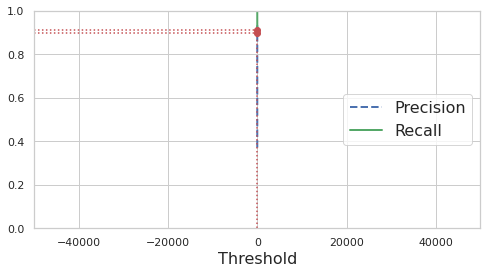

In [140]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                             
    plt.axis([-50000, 50000, 0, 1])            



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                         # Not shown
plt.show()

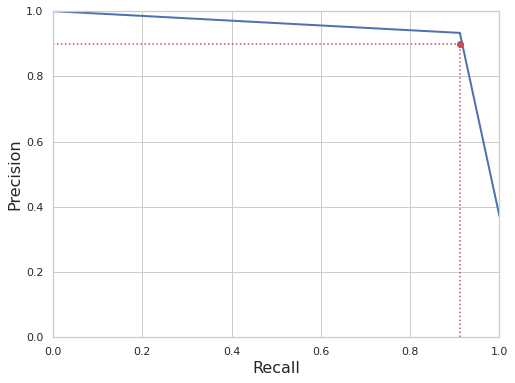

In [141]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

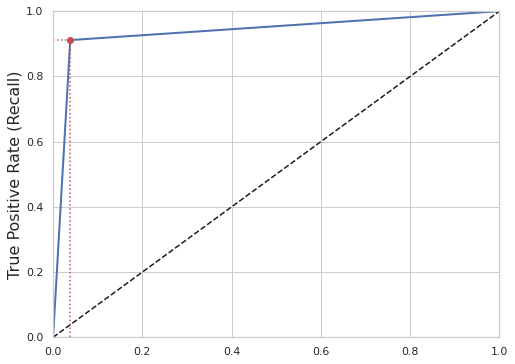

In [142]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                   
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")              
plt.show()

In [143]:
print('Training set score: {:.4f}'.format(DTC_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_gini.score(X_test, y_test)))

Training set score: 0.9780
Test set score: 0.9386


### 方法二 KNN

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, verbose=3)
grid_search.fit(X_train, y_train)
knn_grid_pred = grid_search.predict(X_test)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END ...n_neighbors=3, weights=uniform;, score=0.978 total time=   0.0s
[CV 2/10] END ...n_neighbors=3, weights=uniform;, score=0.913 total time=   0.0s
[CV 3/10] END ...n_neighbors=3, weights=uniform;, score=0.957 total time=   0.0s
[CV 4/10] END ...n_neighbors=3, weights=uniform;, score=0.935 total time=   0.0s
[CV 5/10] END ...n_neighbors=3, weights=uniform;, score=0.978 total time=   0.0s
[CV 6/10] END ...n_neighbors=3, weights=uniform;, score=1.000 total time=   0.0s
[CV 7/10] END ...n_neighbors=3, weights=uniform;, score=0.978 total time=   0.0s
[CV 8/10] END ...n_neighbors=3, weights=uniform;, score=0.978 total time=   0.0s
[CV 9/10] END ...n_neighbors=3, weights=uniform;, score=0.956 total time=   0.0s
[CV 10/10] END ..n_neighbors=3, weights=uniform;, score=0.911 total time=   0.0s
[CV 1/10] END ..n_neighbors=3, weights=distance;, score=0.978 total time=   0.0s
[CV 2/10] END ..n_neighbors=3, weights=distance;

In [145]:
grid_search.best_score_

0.9670531400966184

In [146]:
table = confusion_matrix(y_test, knn_grid_pred)
table

array([[69,  2],
       [ 2, 41]])

In [147]:
accuracy_score(y_test, knn_grid_pred)




0.9649122807017544

In [148]:
precision_score(y_test,knn_grid_pred)

0.9534883720930233

In [149]:
recall_score(y_test,knn_grid_pred)

0.9534883720930233

In [150]:
f1_score(y_test,knn_grid_pred)

0.9534883720930233

In [151]:
sensitivity(table)

0.971830985915493

In [152]:
specificity(table)

0.9534883720930233

In [153]:
roc_auc_score(y_test,knn_grid_pred)

0.9626596790042581

### 方法三  Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [155]:
LR_pred = LR.predict(X_test)

In [156]:
LR_cross_val = cross_val_predict(LR,X_train,y_train,cv=10)

In [157]:
table = confusion_matrix(y_train,LR_cross_val)
table

array([[281,   5],
       [  7, 162]])

In [158]:
accuracy_score(y_train,LR_cross_val)

0.9736263736263736

In [159]:
recall_score(y_train,LR_cross_val)

0.9585798816568047

In [160]:
precision_score(y_train,LR_cross_val)

0.9700598802395209

In [161]:
f1_score(y_train,LR_cross_val)

0.9642857142857144

In [162]:
sensitivity(table)

0.9825174825174825

In [163]:
specificity(table)

0.9585798816568047

In [164]:
roc_auc_score(y_train,LR_cross_val)

0.9705486820871435

In [165]:
print('Training set score: {:.4f}'.format(LR.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(LR.score(X_test, y_test)))

Training set score: 0.9802
Test set score: 0.9825
